# **Solution - Machine Learning Internship**

## **Table of Content**

1. **Problem Understanding**
2. **About Dataset**
3. **Implementation of Project**
   1. **Import Libraries**
   2. **Loading Dataset**
   3. **Data Preprocessing**
      * Data Augmentation
   4. **CNN Modelling**
   5. **Training Model**
   6. **Model Evaluation**
      1. **Accuracy Plot**
      2. **Loss Plot**
      3. **Confusion Matrix Plot**
      4. **Precision & Recall**
      5. **Visualization of Predicted images**  


## **1. Problem Understanding**
The task is to develop a model to classify images of industrial equipment into two categories:

* Defective
* Non-defective

## **2. About Dataset**

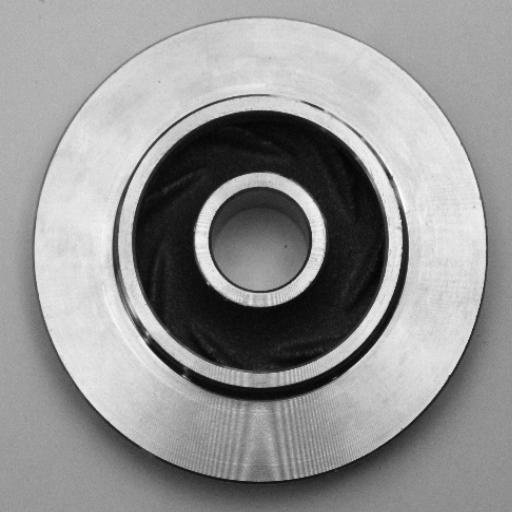

This dataset pertains to the casting manufacturing industry, where liquid materials are molded and solidified to form specific shapes. Casting defects, such as blow holes, shrinkage, and metallurgical inconsistencies, pose significant challenges. These imperfections can result in product rejection, causing substantial financial losses. Manual inspection methods, often slow and prone to human error, lack complete accuracy, making automation essential for efficiency and reliability.

The dataset comprises 7,348 grayscale images (300x300 pixels), including augmented data. Images are organized into training and testing folders, each containing subcategories for defective ('def_front') and non-defective ('ok_front') parts. This structure supports the development of deep learning models for automated quality inspection.

[Dataset Link](http://https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product/data)
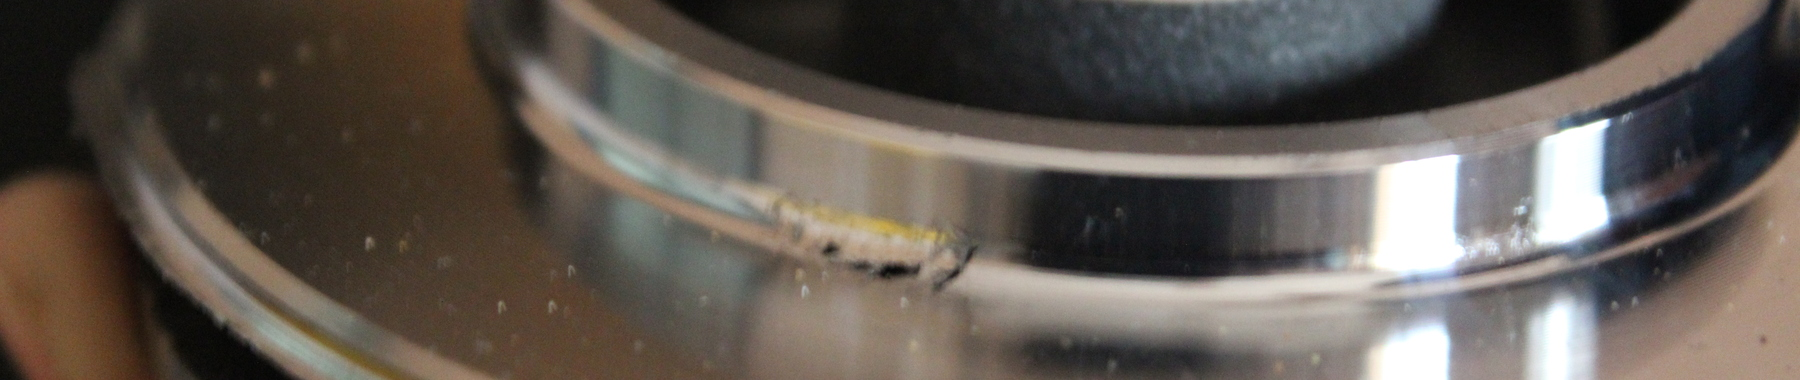

## **3. Implementation of Project**

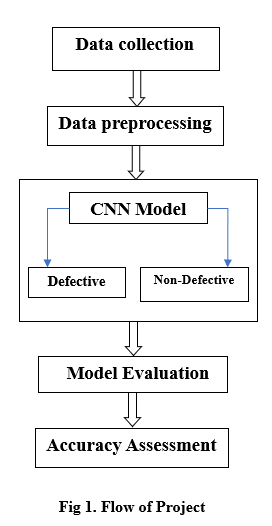

### **3.1 Import Libraries**

This code imports essential libraries, initializes TensorFlow/Keras modules for deep learning, and lists files within the specified directory.

* TensorFlow/Keras are powerful open-source libraries for building, training, and deploying deep learning and neural networks.

In [1]:
import numpy as np # For numerical operations
import pandas as pd # For data manipulation
import tensorflow as tf # Core library for deep learning
from tensorflow import keras
import matplotlib.pyplot as plt # For data visualization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # Image processing utilities
from tensorflow.keras.models import Sequential # For creating sequential models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout # Model layers


# Print all file paths from a specified directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_496.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5003.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5942.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_6258.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_2162.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_8021.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_7693.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_4010.jpeg
/kaggle/input/rea

### **3.2 Loading Dataset**

In [7]:
train_dir = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train'
test_dir = '/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test'

### **3.3 Data Preprocessing**

**3.3.1 Data Augmentation**

In [8]:
# Initialize an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to the range [0, 1]
                             rotation_range=20, # Randomly rotate images up to 20 degrees for augmentation
                             width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
                             height_shift_range=0.1, # Shift images vertically by up to 10% of the height
                             horizontal_flip=True) # Randomly flip images horizontally

# Initialize an ImageDataGenerator for testing with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255) # Normalize pixel values to [0, 1]

# Create an iterator for the training data
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(200, 200),  # Resize all images
                                              batch_size=32, 
                                              class_mode='categorical', # Multiclass classification mode
                                              shuffle=True)

# Create an iterator for the testing data
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),  # Resize all images 
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [9]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


In [10]:
# Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


In [12]:
# Function to get a single sample image and its corresponding label from a data generator
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name

# Function to display multiple sample images in a grid format
def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

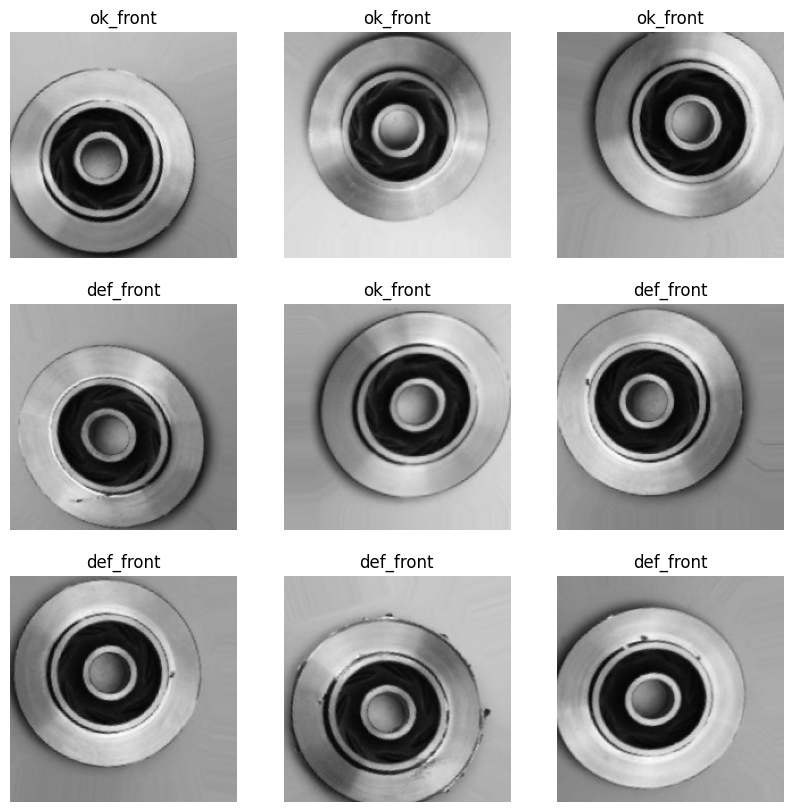

In [13]:
sample_images(train_data, nrows=3, ncols=3)

In [14]:
image_batch

array([[[[0.631039  , 0.631039  , 0.631039  ],
         [0.6326118 , 0.6326118 , 0.6326118 ],
         [0.6341847 , 0.6341847 , 0.6341847 ],
         ...,
         [0.5432071 , 0.5432071 , 0.5432071 ],
         [0.5472811 , 0.5472811 , 0.5472811 ],
         [0.5523332 , 0.5523332 , 0.5523332 ]],

        [[0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         [0.627451  , 0.627451  , 0.627451  ],
         ...,
         [0.54862183, 0.54862183, 0.54862183],
         [0.54896235, 0.54896235, 0.54896235],
         [0.55037576, 0.55037576, 0.55037576]],

        [[0.62351453, 0.62351453, 0.62351453],
         [0.6250873 , 0.6250873 , 0.6250873 ],
         [0.62666017, 0.62666017, 0.62666017],
         ...,
         [0.55237544, 0.55237544, 0.55237544],
         [0.54864174, 0.54864174, 0.54864174],
         [0.5466842 , 0.5466842 , 0.5466842 ]],

        ...,

        [[0.75294125, 0.75294125, 0.75294125],
         [0.75294125, 0.75294125, 0.75294125]

### **3.4 CNN Modelling**

Convolutional Neural Networks (CNNs) are specialized neural networks for processing grid-like data, such as images. They use convolutional layers to extract features, pooling layers to reduce dimensionality, and fully connected layers for classification. CNNs automatically learn hierarchical features, making them highly effective for image classification and related tasks.

**Flow of Data:**

* **Input:** The input image is a 200x200 RGB image (shape: 200x200x3).
* **Convolutional Layers:** Three sets of convolutional and max-pooling layers extract features from the image.
* **Flattening:** After feature extraction, the 2D features are flattened into a 1D vector.
* **Fully Connected Layers:** The flattened data is passed through a dense layer for classification. Dropout helps reduce overfitting.
* **Output:** The output layer produces a probability distribution over two classes using the softmax activation function.

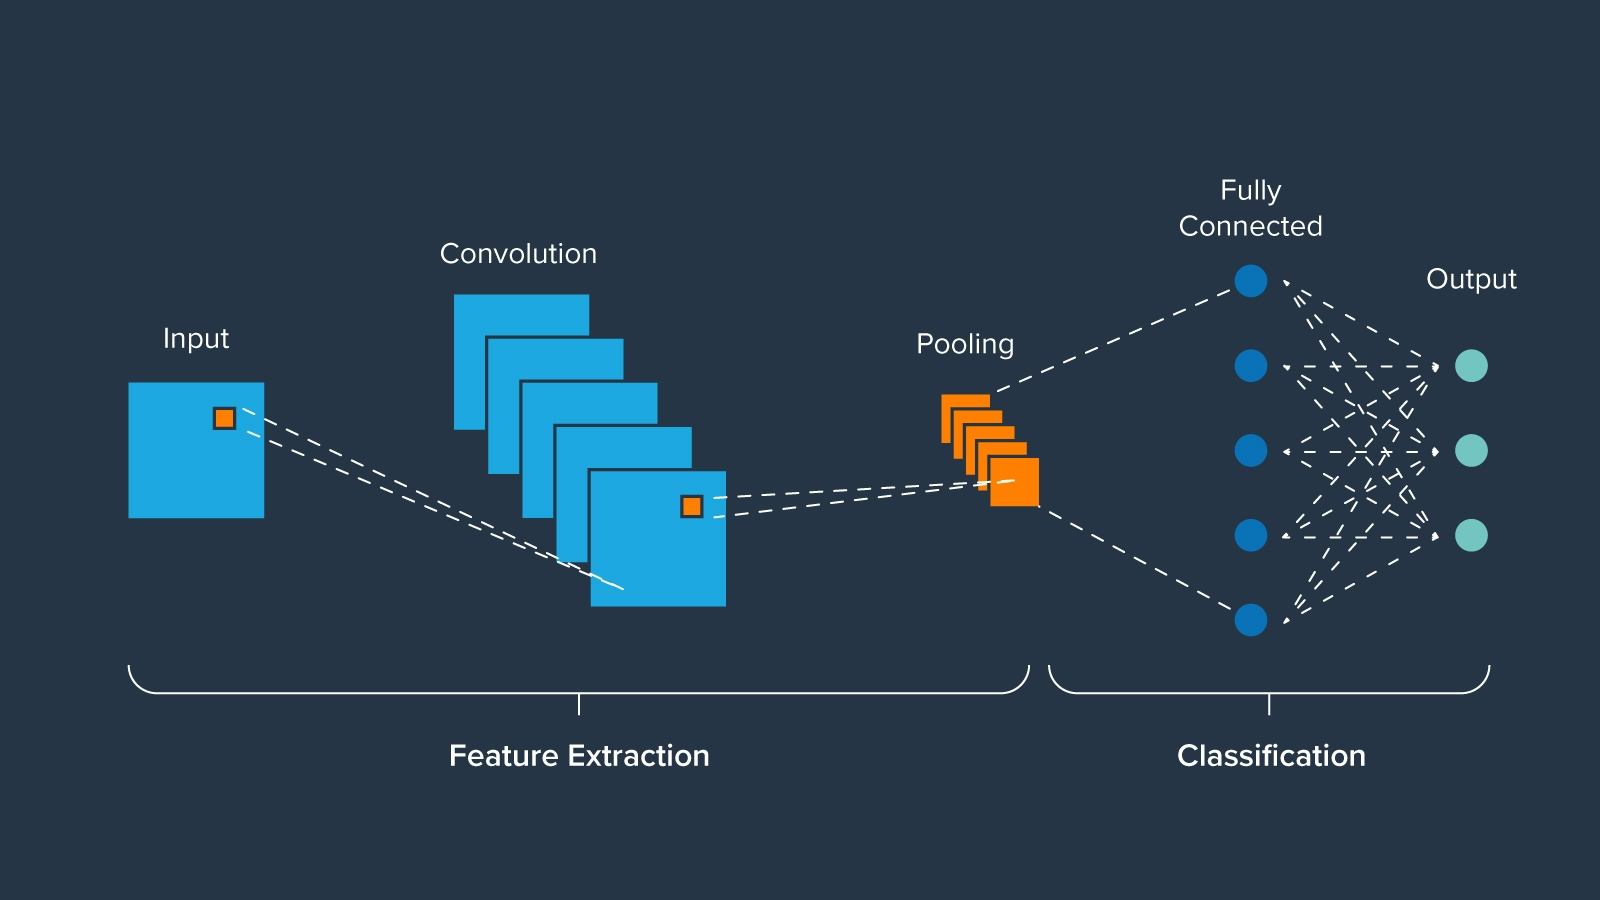
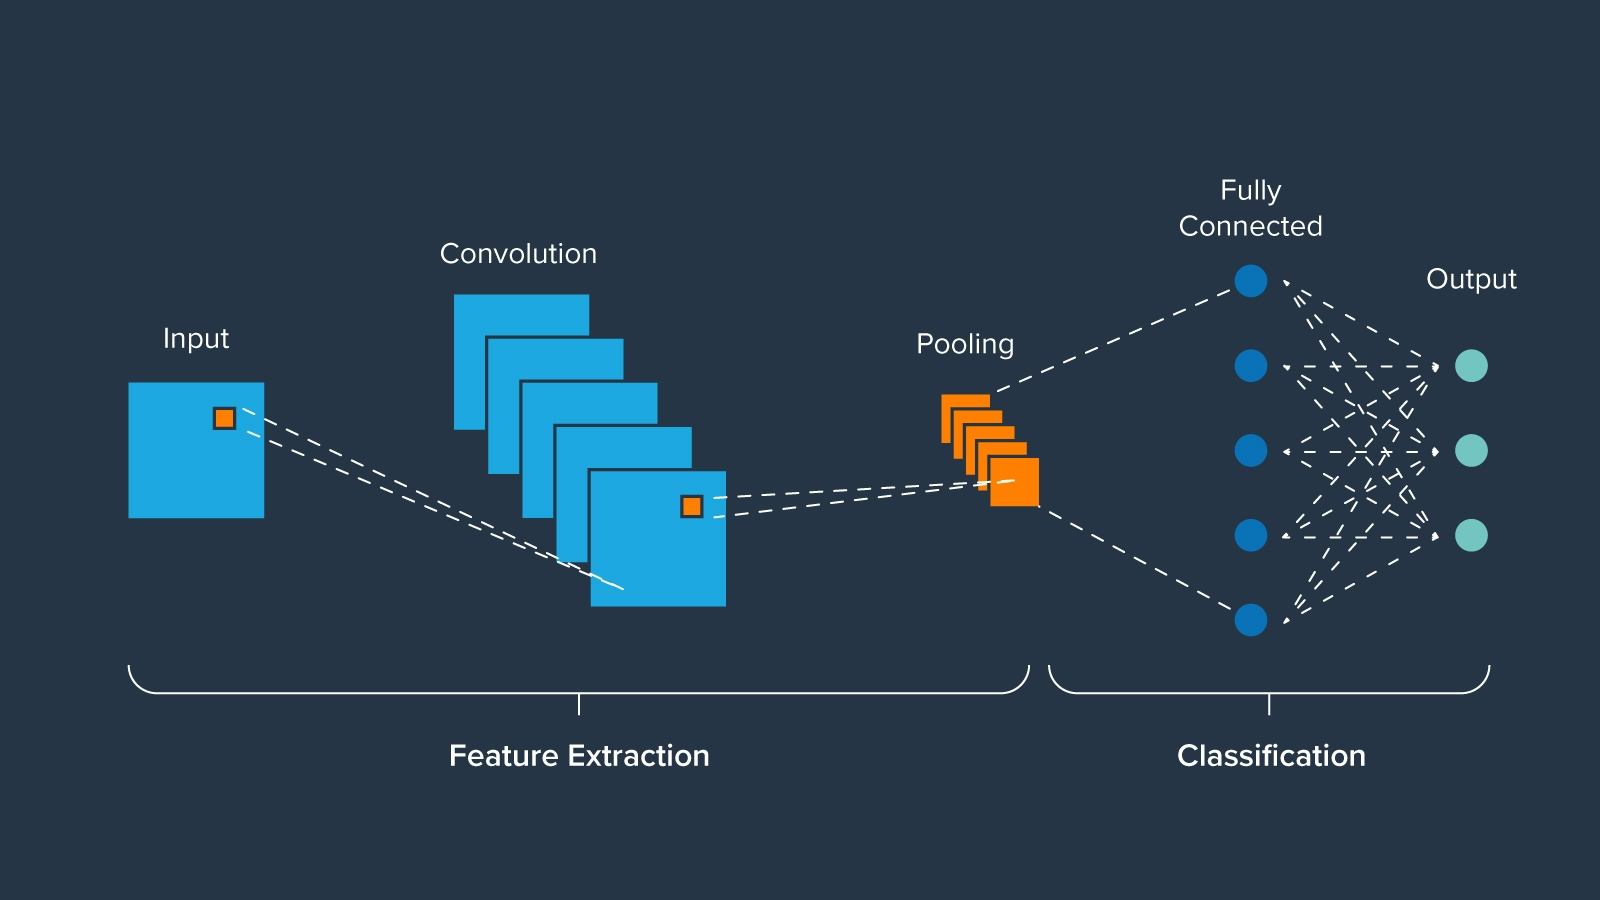

In [15]:
# Model layers
# Initialize the Sequential model, which allows you to build the neural network layer by layer
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,916,706 (72.16 MB)

 Trainable params: 18,916,706 (72.16 MB)

 Non-trainable params: 0 (0.00 B)

### **3.5 Training Model**

In [19]:
# Train the model using the fit method
history = model.fit(train_data,
                    epochs=20, #number of iterations over dataset to train the model
                    batch_size=32, # number of samples per gradient update
                    )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731690987.801585     140 service.cc:145] XLA service 0x780af0005410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731690987.801627     140 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731690987.801636     140 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/208 ━━━━━━━━━━━━━━━━━━━━ 36:50 11s/step - accuracy: 0.5312 - loss: 0.6929

I0000 00:00:1731690993.154020     140 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


208/208 ━━━━━━━━━━━━━━━━━━━━ 105s 454ms/step - accuracy: 0.5642 - loss: 0.8654
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 279ms/step - accuracy: 0.7275 - loss: 0.5133
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 278ms/step - accuracy: 0.8281 - loss: 0.3812
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 279ms/step - accuracy: 0.8808 - loss: 0.2718
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 277ms/step - accuracy: 0.9024 - loss: 0.2301
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 277ms/step - accuracy: 0.9270 - loss: 0.1773
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 278ms/step - accuracy: 0.9384 - loss: 0.1629
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 280ms/step - accuracy: 0.9588 - loss: 0.1190
Epoch 9/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 279ms/step - accuracy: 0.9526 - loss: 0.1239
Epoch 10/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 60s 280ms/step - accuracy: 0.9715 - loss: 0.0821
Epoch 11/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 61s 283ms/step - accuracy: 0.9563 - loss: 0.1133
Epoch 12/20
208/208 ━━━━━━━━━

### **3.6 Model Evaluation**

CNN-based model evaluation involves assessing performance using metrics like accuracy, precision, recall, and confusion matrix. Also provided sample images for verification.

In [29]:
def plot_history(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

#### **3.6.1 Accuracy Plot**

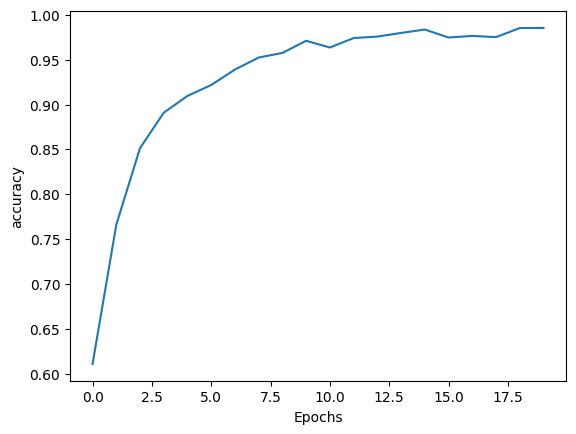

In [30]:
plot_history(history, 'accuracy')

#### **3.6.2 Loss Plot**

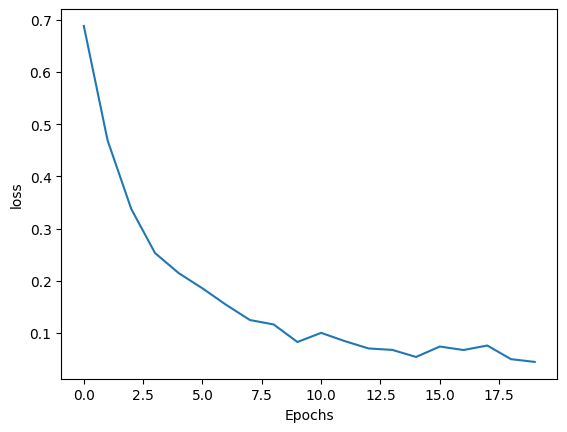

In [31]:
plot_history(history, 'loss')

In [32]:
result = model.evaluate(test_data)
print("Test loss, Test accuracy : ", result)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9868 - loss: 0.0440
Test loss, Test accuracy :  [0.03429245948791504, 0.988811194896698]


#### **3.6.3 Confusion Matrix Plot**

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


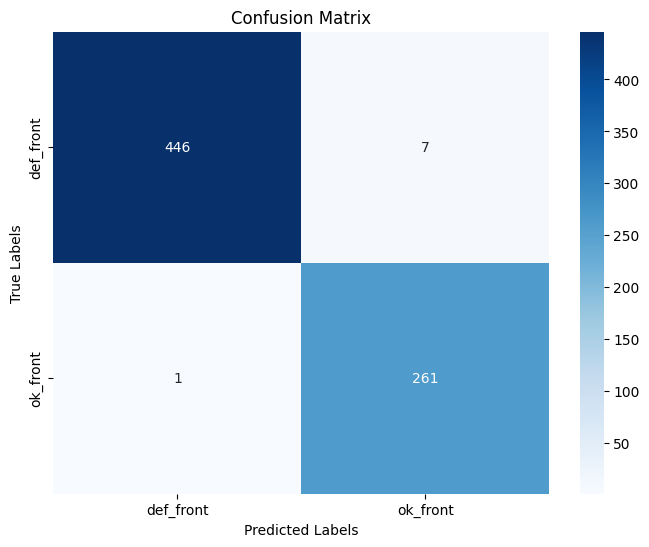

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on the test set
y_true = test_data.classes  # Actual labels
y_pred_probs = model.predict(test_data)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class indices

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### **3.6.4 Precision and Recall**

In [42]:
# Calculate precision and recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Precision and Recall
print("Precision Score: ", precision)
print("Recall Score: ", recall)

Precision Score:  0.9890115994393265
Recall Score:  0.9888111888111888


#### **3.6.5 Visualization of Predicted images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


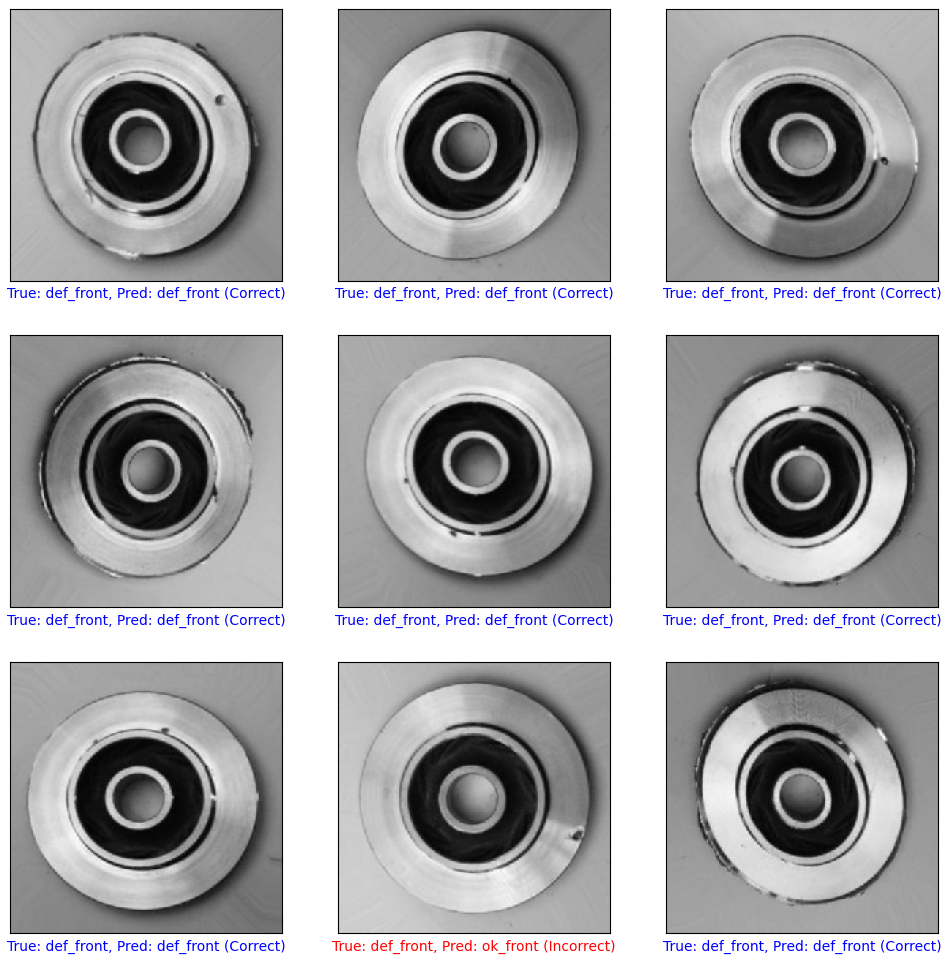

In [37]:
images, labels = next(test_data)    

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)


class_names=list(test_data.class_indices.keys())


plt.figure(figsize=(12,12))
    
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    image = images[i]
        
    if image.shape[-1] == 1:
        image = np.squeeze(image) 
        
    plt.imshow(image)
        
    predicted_label = np.argmax(predictions[i])
        
    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"
            
    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"        
            
    plt.xlabel(label_text,color=color)